#   Лаборатоная работа 1
***
***Выполнила:*** *Нечаева Анна Анатольвна, R3338, МашОб 31.1*
***
**Цель работы:** Научиться применять инструменты для подготовки данных.

**Инструменты:** pandas, numpy, scipy, matplotlib/seaborn.

**Содержание:**

Для предложенных датасетов провести первичный статистический анализ. Для этого необходимо:

1. Вычислить меры центральной тенденции (выборочное среднее, медиана, мода и т.д.)
2. Вычислить меры разброса (дисперсия, среднеквадратичное отклонение, min/max-value, IQR)
3. Вычислить параметры формы распределений каждого признака (асимметрия, эксцесс)
4. Построить гистограммы каждого признака, а также ECDF (функция распределения) и KDE (ядерная оценка плотности вероятности). Можно также построить pairplot из seaborn.
5. Вычислить матрицу корреляций между признаками. Построить тепловую карту (heatmap).

После этого исследовать датасеты на возможность:
1. Извлечения новых признаков (feature extraction).
2. Преобразования признаков (feature transformation). Как минимум z-score scaling.
3. Отбора признаков и объектов (feature selection). Как минимум анализ выбросов, аномалий и сильно коррелирующих признаков.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Работа с первым датасетом (Advertising)

###  Первичный статистический анализ

In [3]:
def read_data(path, filename):
    return pd.read_csv(os.path.join(path, filename))

adv_data = read_data('drive/MyDrive/ML_3_year_data', 'Advertising.csv')
adv_data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


***
**1. Вычисление мер центральной тенденции.**
***

In [4]:
mean = adv_data.mean()   # Выборочное среднеее
median = adv_data.median()   # Медиана
mode = adv_data.mode().iloc[0]   # Мода

print('\u001b[36;1mВыборочное среднее:\u001b[34;1m', mean,'\u001b[0m')
print('-------------------------------------------------------')
print('\u001b[36;1mМедиана:\u001b[34;1m', median,'\u001b[0m')
print('-------------------------------------------------------')
print('\u001b[36;1mМода:\u001b[34;1m', mode,'\u001b[0m')
print('-------------------------------------------------------')

Выборочное среднее: TV           147.0425
radio         23.2640
newspaper     30.5540
sales         14.0225
dtype: float64 
-------------------------------------------------------
Медиана: TV           149.75
radio         22.90
newspaper     25.75
sales         12.90
dtype: float64 
-------------------------------------------------------
Мода: TV           17.2
radio         4.1
newspaper     8.7
sales         9.7
Name: 0, dtype: float64 
-------------------------------------------------------


***
**2. Вычисление мер разброса.**
***

In [5]:
variance = adv_data.var()   # Дисперсия
std_dev = adv_data.std()   # Среднеквадратичное отклонение
min_value = adv_data.min()   # Min-value
max_value = adv_data.max()   # Max-value
IQR = adv_data.quantile(0.75) - adv_data.quantile(0.25)   # IQR

print('\u001b[36;1mДисперсия:\u001b[34;1m', variance,'\u001b[0m')
print('-------------------------------------------------------')
print('\u001b[36;1mСреднеквадратичное отклонение:\u001b[34;1m', std_dev,'\u001b[0m')
print('-------------------------------------------------------')
print('\u001b[36;1mMin-value:\u001b[34;1m', min_value,'\u001b[0m')
print('-------------------------------------------------------')
print('\u001b[36;1mMax-value:\u001b[34;1m', max_value,'\u001b[0m')
print('-------------------------------------------------------')
print('\u001b[36;1mIQR:\u001b[34;1m', IQR,'\u001b[0m')
print('-------------------------------------------------------')


Дисперсия: TV           7370.949893
radio         220.427743
newspaper     474.308326
sales          27.221853
dtype: float64 
-------------------------------------------------------
Среднеквадратичное отклонение: TV           85.854236
radio        14.846809
newspaper    21.778621
sales         5.217457
dtype: float64 
-------------------------------------------------------
Min-value: TV           0.7
radio        0.0
newspaper    0.3
sales        1.6
dtype: float64 
-------------------------------------------------------
Max-value: TV           296.4
radio         49.6
newspaper    114.0
sales         27.0
dtype: float64 
-------------------------------------------------------
IQR: TV           144.450
radio         26.550
newspaper     32.350
sales          7.025
dtype: float64 
-------------------------------------------------------


***
**3. Вычисление параметров формы распределений каждого признака.**
***

In [6]:
from scipy.stats import skew, kurtosis


print('\u001b[36;1mПризнак    Асимметрия  Эксцесс\u001b[0m')
print('-------------------------------------------------------')
# Расчет асимметрии и эксцесса для каждого признака
for column in adv_data.columns:
    if pd.api.types.is_numeric_dtype(adv_data[column]):
        feature_skewness = skew(adv_data[column].dropna())
        feature_kurtosis = kurtosis(adv_data[column].dropna())
        print('\u001b[36;1m', column,' \u001b[34;1m',' ' * (len('newspaper') - len(column)), round(feature_skewness, 3),' ', round(feature_kurtosis, 3),'\u001b[0m')




Признак    Асимметрия  Эксцесс
-------------------------------------------------------
 TV           -0.069   -1.226 
 radio        0.093   -1.259 
 newspaper    0.888   0.604 
 sales        0.405   -0.429 


***
**4. Построение гистограммы каждого признака, а также ECDF (функция распределения) и KDE (ядерная оценка плотности вероятности).**
***

<Axes: xlabel='TV', ylabel='Density'>

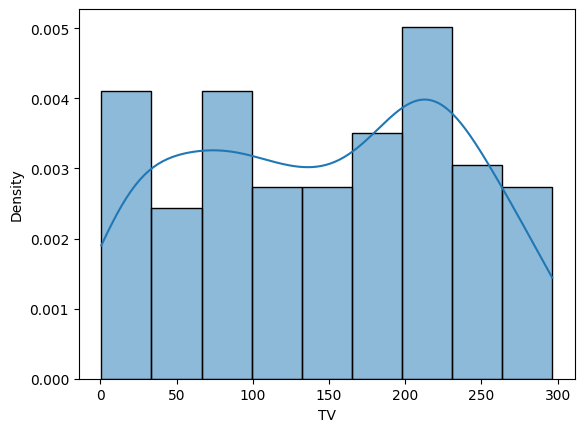

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Построение гистограмм для каждого признака
sns.histplot(adv_data['TV'], stat='density', kde=True)


<Axes: xlabel='radio', ylabel='Density'>

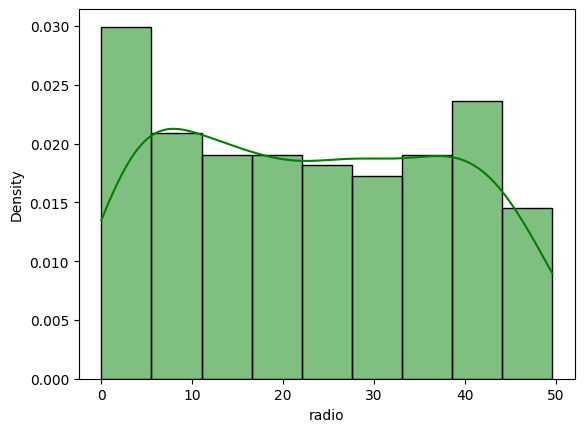

In [8]:
sns.histplot(adv_data['radio'], stat='density', kde=True, color='g')

<Axes: xlabel='newspaper', ylabel='Density'>

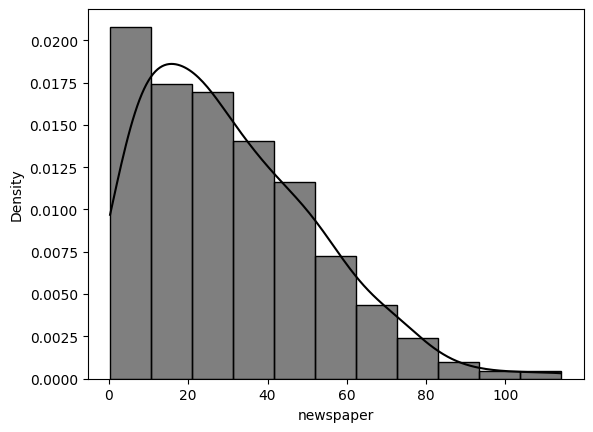

In [9]:
sns.histplot(adv_data['newspaper'], stat='density', kde=True, color='k')

<Axes: xlabel='sales', ylabel='Density'>

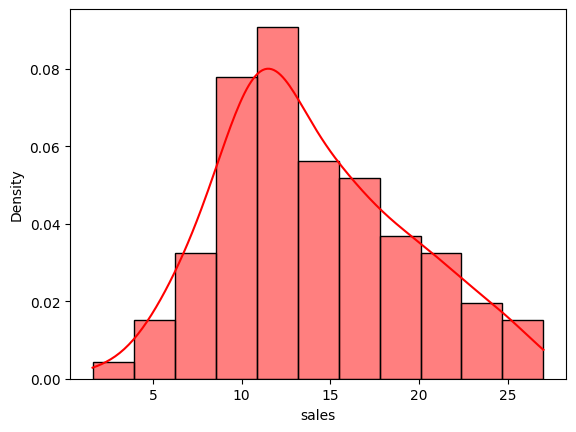

In [10]:
sns.histplot(adv_data['sales'], stat='density', kde=True, color='r')

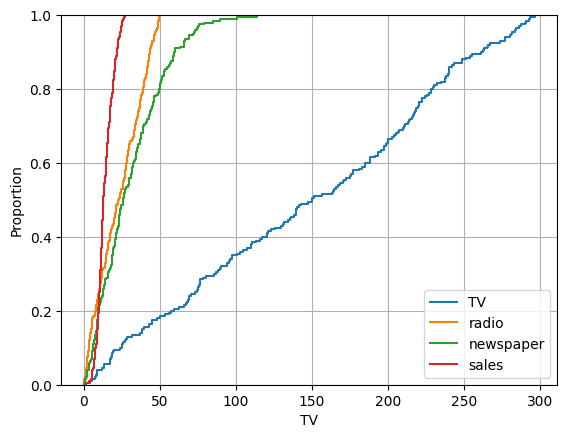

In [11]:
# ECDF
for col in adv_data.columns:
    sns.ecdfplot(adv_data[col], label=col)

plt.grid('on')
plt.legend()
plt.show()

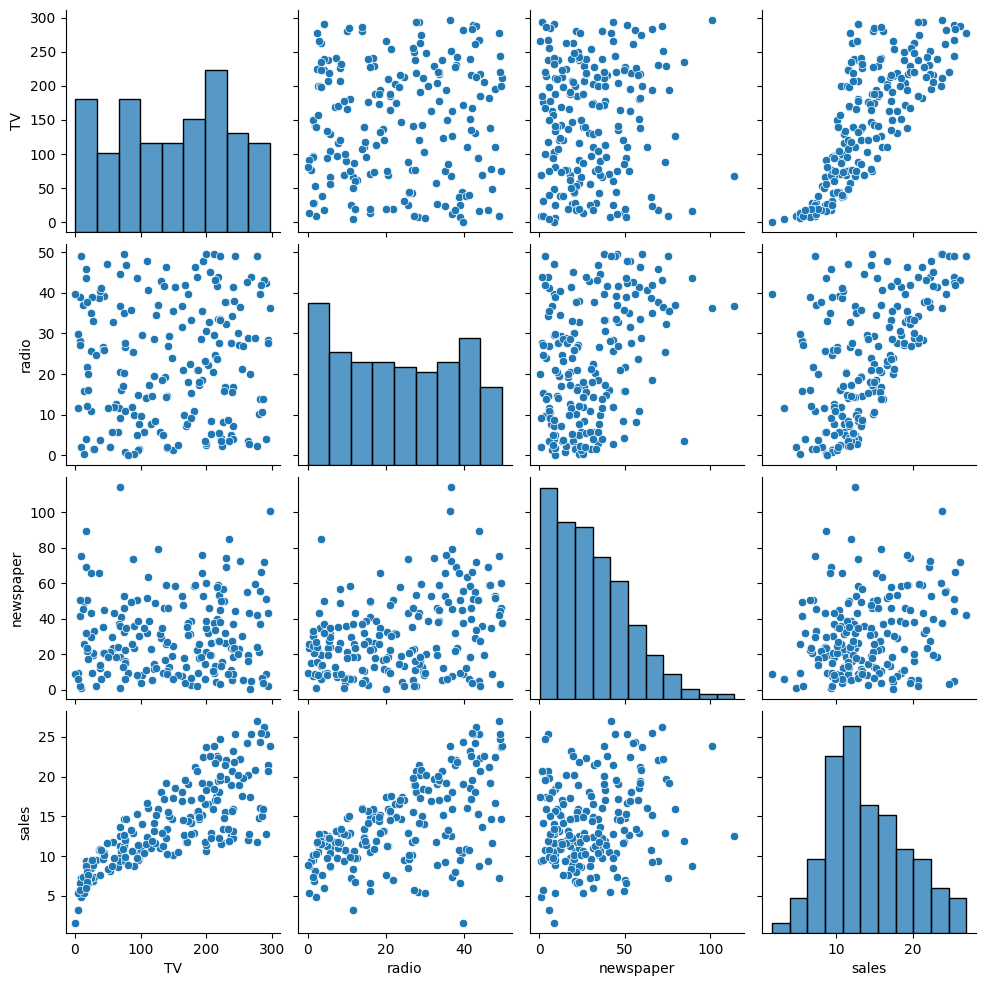

In [12]:
# Pairplot
sns.pairplot(adv_data)
plt.show()

***
**5. Вычислить матрицу корреляций между признаками. Построить тепловую карту (heatmap).**
***

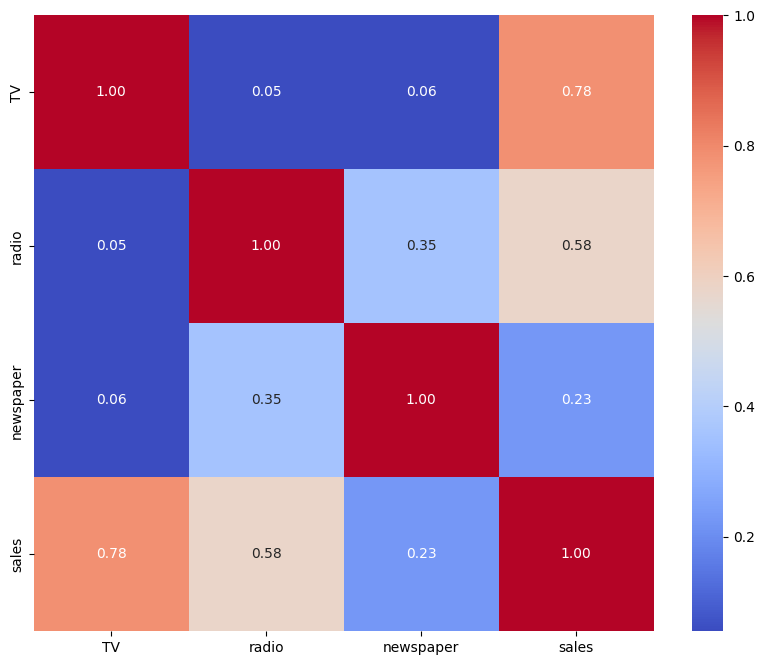

In [13]:
# Матрица корреляций
correlation_matrix = adv_data.corr()

# Тепловая карта
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


### Дополнительное исследование датасета

***
**1. Извлечения новых признаков (feature extraction).**
***

Извлечение новых признаков можно проводить с помощью различных методов, в зависимости от вида данных. Например, можно создать взаимодействия между существующими признаками или создать группы признаков. Однако в данном случае, нет необходимости извлекать новые признаки, потому что каждый из признаков в отдельности оказывает влияние на целевую переменную `'sales'` и извлекать новые признаки не имеет смысла.

***
**2. Отбор признаков и объектов (feature selection). Как минимум анализ выбросов, аномалий и сильно коррелирующих признаков.**
***

Отбор сильно коррелирующих признаков

Можно рассмотреть коррелирующие признаки `'radio'` и `'newspaper'`, причем `'newspaper'` меньше влияет на `'sales'`, следовательно, можно не учитывать этот признак.

In [35]:
# Удаление сильно коррелирующих признаков
y_data_new = adv_data['sales']
x_data_new = adv_data.drop('sales', axis=1)
x_data_new = x_data_new.drop('newspaper', axis=1)
x_data_new

,TV,radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8
...,...,...
195,38.2,3.7
196,94.2,4.9
197,177.0,9.3
198,283.6,42.0


***
**3. Преобразования признаков (feature transformation). Как минимум z-score scaling.**
***

Для преобразования признаков можно использовать стандартное масштабирование, такое как z-score scaling:

In [36]:
'''from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(adv_data), columns=adv_data.columns)
data_scaled
'''
mean_adv = np.mean(x_data_new)
std_adv = np.std(x_data_new)
z_scores_adv = (x_data_new - mean_adv) / std_adv
z_scores_adv


,TV,radio
0,1.692525,-3.197460
1,-0.474703,-3.096175
2,-0.793482,-2.650519
3,0.774723,-2.961128
4,1.116855,-5.020596
...,...,...
195,-0.548267,-5.500013
196,0.105638,-5.418985
197,1.072483,-5.121881
198,2.317238,-2.913861


***
**4. Сохранение данных для дальнейшей работы.**
***

In [39]:
pd.concat([z_scores_adv, y_data_new],axis=1).to_csv(os.path.join('drive/MyDrive/ML_3_year_data','Advertising_new.csv'))


## Работа со вторым датасетом (heart)

###  Первичный статистический анализ

In [14]:
def read_data(path, filename):
    return pd.read_csv(os.path.join(path, filename))

h_data = read_data('drive/MyDrive/ML_3_year_data', 'heart.csv')
h_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


***
**1. Вычисление мер центральной тенденции.**
***

In [15]:
mean = h_data.mean()   # Выборочное среднее
median = h_data.median()   # Медиана
mode = h_data.mode().iloc[0]   # Мода

print('\u001b[36;1mВыборочное среднее:\u001b[34;1m\n', mean,'\u001b[0m')
print('-------------------------------------------------------')
print('\u001b[36;1mМедиана:\u001b[34;1m\n', median,'\u001b[0m')
print('-------------------------------------------------------')
print('\u001b[36;1mМода:\u001b[34;1m\n', mode,'\u001b[0m')
print('-------------------------------------------------------')

Выборочное среднее:
 age          54.366337
sex           0.683168
cp            0.966997
trestbps    131.623762
chol        246.264026
fbs           0.148515
restecg       0.528053
thalach     149.646865
exang         0.326733
oldpeak       1.039604
slope         1.399340
ca            0.729373
thal          2.313531
target        0.544554
dtype: float64 
-------------------------------------------------------
Медиана:
 age          55.0
sex           1.0
cp            1.0
trestbps    130.0
chol        240.0
fbs           0.0
restecg       1.0
thalach     153.0
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal          2.0
target        1.0
dtype: float64 
-------------------------------------------------------
Мода:
 age          58.0
sex           1.0
cp            0.0
trestbps    120.0
chol        197.0
fbs           0.0
restecg       1.0
thalach     162.0
exang         0.0
oldpeak       0.0
slope         2.0
ca            0.0
thal          2.0
target    

***
**2. Вычисление мер разброса.**
***

In [16]:
variance = h_data.var()   # Дисперсия
std_dev = h_data.std()   # Среднеквадратичное отклонение
min_value = h_data.min()   # Min-value
max_value = h_data.max()   # Max-value
IQR = h_data.quantile(0.75) - h_data.quantile(0.25)   # IQR

print('\u001b[36;1mДисперсия:\u001b[34;1m\n', variance,'\u001b[0m')
print('-------------------------------------------------------')
print('\u001b[36;1mСреднеквадратичное отклонение:\u001b[34;1m\n', std_dev,'\u001b[0m')
print('-------------------------------------------------------')
print('\u001b[36;1mMin-value:\u001b[34;1m\n', min_value,'\u001b[0m')
print('-------------------------------------------------------')
print('\u001b[36;1mMax-value:\u001b[34;1m\n', max_value,'\u001b[0m')
print('-------------------------------------------------------')
print('\u001b[36;1mIQR:\u001b[34;1m\n', IQR,'\u001b[0m')
print('-------------------------------------------------------')

Дисперсия:
 age           82.484558
sex            0.217166
cp             1.065132
trestbps     307.586453
chol        2686.426748
fbs            0.126877
restecg        0.276528
thalach      524.646406
exang          0.220707
oldpeak        1.348095
slope          0.379735
ca             1.045724
thal           0.374883
target         0.248836
dtype: float64 
-------------------------------------------------------
Среднеквадратичное отклонение:
 age          9.082101
sex          0.466011
cp           1.032052
trestbps    17.538143
chol        51.830751
fbs          0.356198
restecg      0.525860
thalach     22.905161
exang        0.469794
oldpeak      1.161075
slope        0.616226
ca           1.022606
thal         0.612277
target       0.498835
dtype: float64 
-------------------------------------------------------
Min-value:
 age          29.0
sex           0.0
cp            0.0
trestbps     94.0
chol        126.0
fbs           0.0
restecg       0.0
thalach      71.0
exang       

***
**3. Вычислить параметры формы распределений каждого признака**
***

In [17]:
from scipy.stats import skew, kurtosis

print('\u001b[36;1mПризнак    Асимметрия  Эксцесс\u001b[0m')
print('-------------------------------------------------------')
# Расчет асимметрии и эксцесса для каждого признака
for column in h_data.columns:
    if pd.api.types.is_numeric_dtype(h_data[column]):
        feature_skewness = skew(h_data[column].dropna())
        feature_kurtosis = kurtosis(h_data[column].dropna())
        print('\u001b[36;1m', column,' \u001b[34;1m',' ' * (len('trestbps') - len(column)), round(feature_skewness, 3),'  ', round(feature_kurtosis, 3),'\u001b[0m')

Признак    Асимметрия  Эксцесс
-------------------------------------------------------
 age         -0.201    -0.553 
 sex         -0.787    -1.38 
 cp          0.482    -1.193 
 trestbps    0.71    0.894 
 chol        1.138    4.412 
 fbs         1.977    1.908 
 restecg     0.162    -1.36 
 thalach     -0.535    -0.081 
 exang       0.739    -1.454 
 oldpeak     1.263    1.53 
 slope       -0.506    -0.637 
 ca          1.304    0.806 
 thal        -0.474    0.273 
 target      -0.179    -1.968 


***
**4. Построить гистограммы каждого признака, а также ECDF (функция распределения) и KDE (ядерная оценка плотности вероятности).**
***

<Axes: xlabel='age', ylabel='Density'>

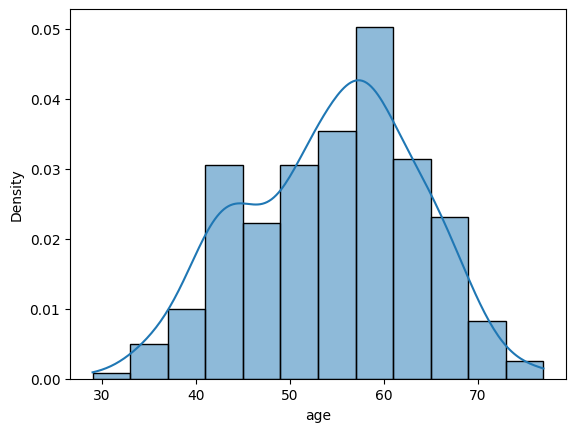

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Гистограммы для каждого признакака

sns.histplot(h_data['age'], stat='density', kde=True)

<Axes: xlabel='sex', ylabel='Density'>

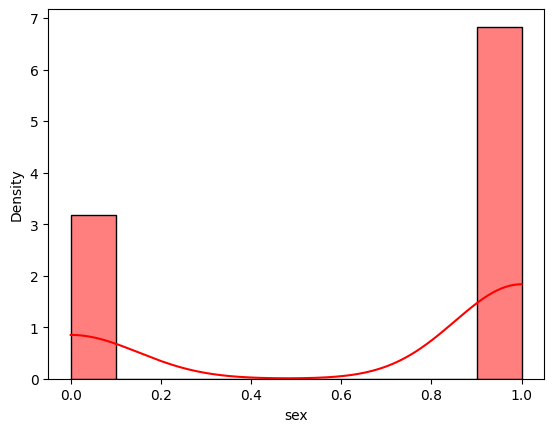

In [19]:
sns.histplot(h_data['sex'], stat='density', kde=True, color='r')

<Axes: xlabel='cp', ylabel='Density'>

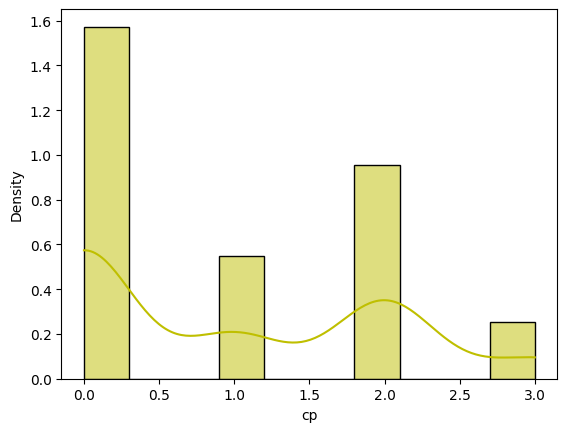

In [20]:
sns.histplot(h_data['cp'], stat='density', kde=True, color='y')

<Axes: xlabel='trestbps', ylabel='Density'>

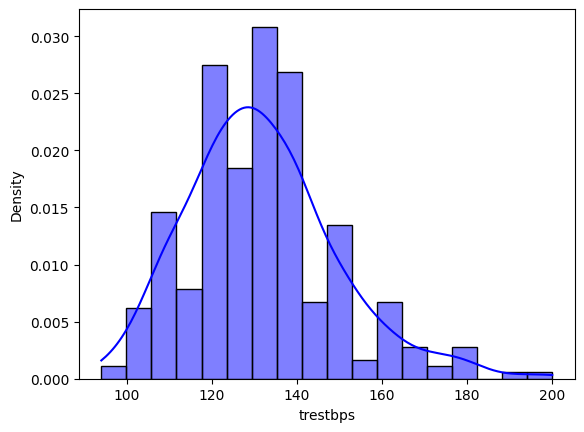

In [21]:
sns.histplot(h_data['trestbps'], stat='density', kde=True, color='b')

<Axes: xlabel='chol', ylabel='Density'>

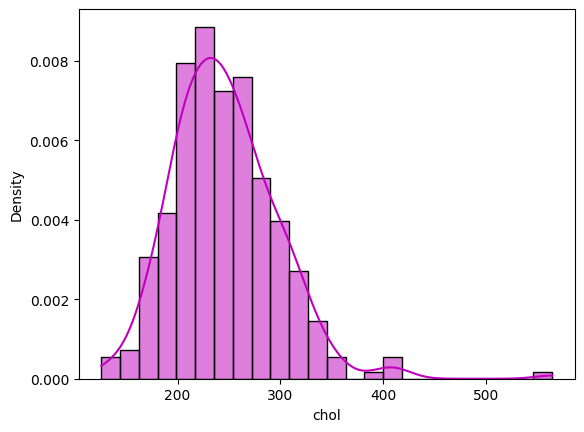

In [22]:
sns.histplot(h_data['chol'], stat='density', kde=True, color='m')

<Axes: xlabel='fbs', ylabel='Density'>

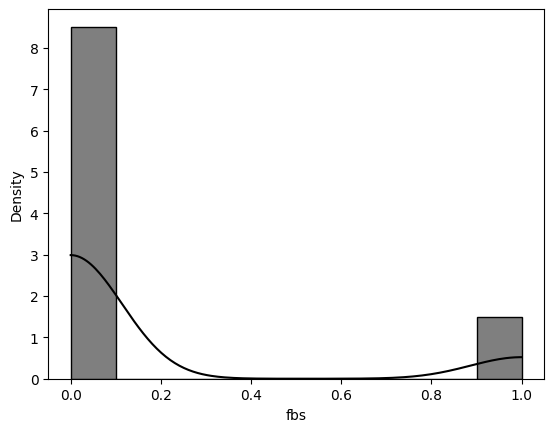

In [23]:
sns.histplot(h_data['fbs'], stat='density', kde=True, color='k')

<Axes: xlabel='restecg', ylabel='Density'>

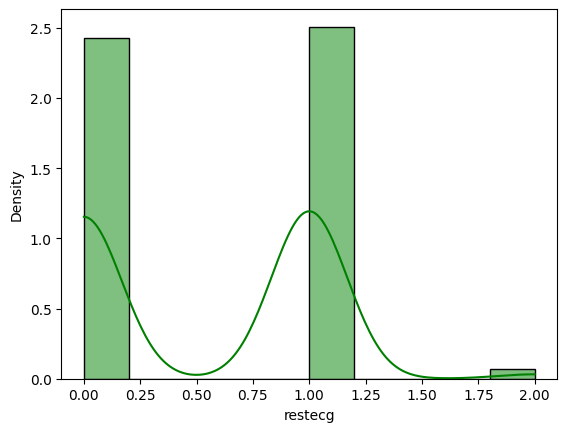

In [24]:
sns.histplot(h_data['restecg'], stat='density', kde=True, color='g')

<Axes: xlabel='thalach', ylabel='Density'>

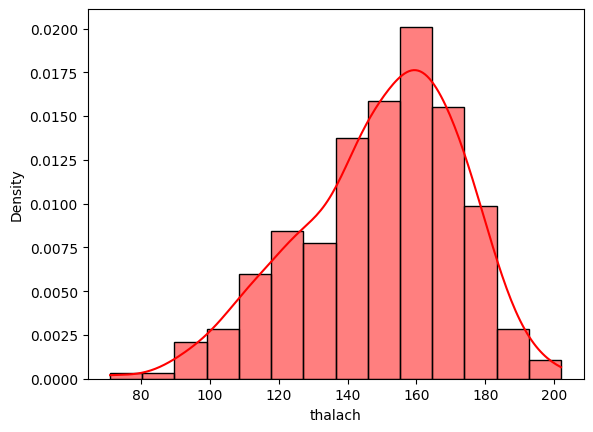

In [25]:
sns.histplot(h_data['thalach'], stat='density', kde=True, color='r')

<Axes: xlabel='exang', ylabel='Density'>

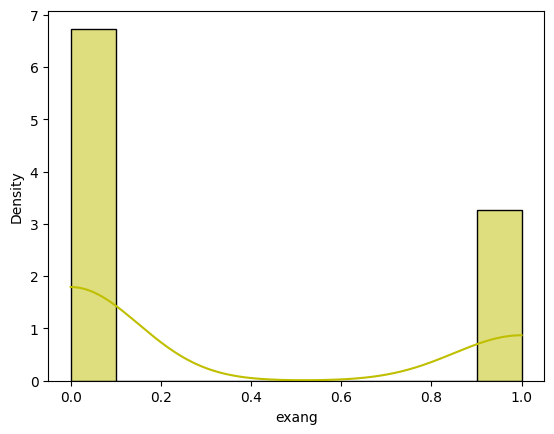

In [26]:
sns.histplot(h_data['exang'], stat='density', kde=True, color='y')

<Axes: xlabel='oldpeak', ylabel='Density'>

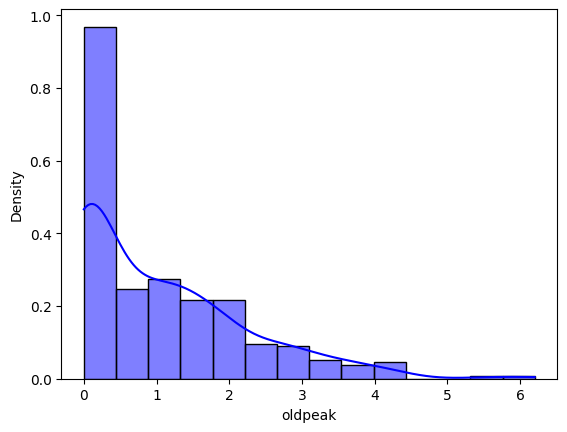

In [27]:
sns.histplot(h_data['oldpeak'], stat='density', kde=True, color='b')

<Axes: xlabel='slope', ylabel='Density'>

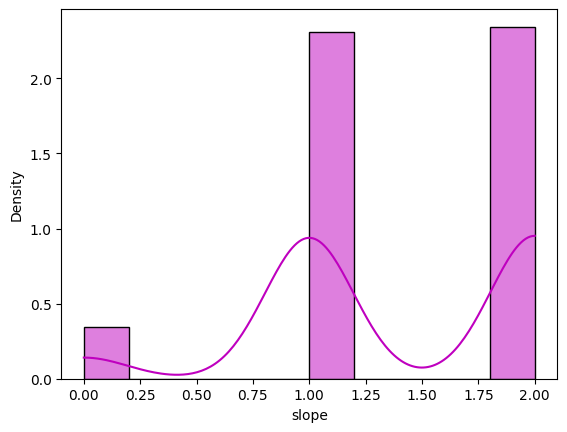

In [28]:
sns.histplot(h_data['slope'], stat='density', kde=True, color='m')

<Axes: xlabel='ca', ylabel='Density'>

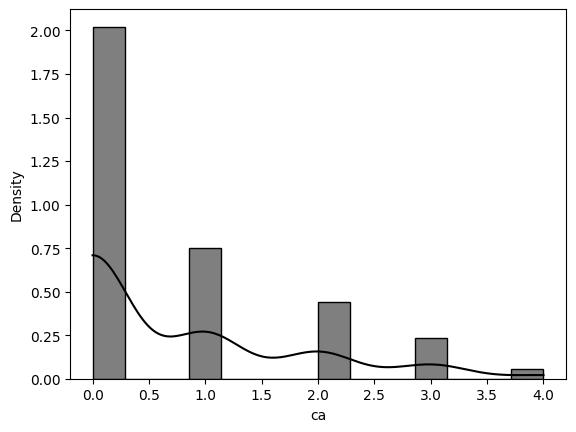

In [29]:
sns.histplot(h_data['ca'], stat='density', kde=True, color='k')

<Axes: xlabel='thal', ylabel='Density'>

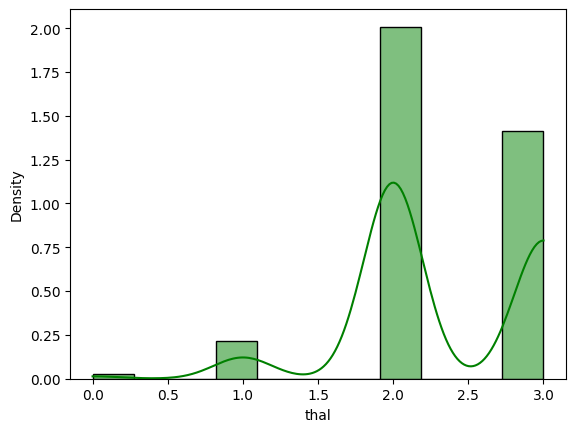

In [30]:
sns.histplot(h_data['thal'], stat='density', kde=True, color='g')

<Axes: xlabel='target', ylabel='Density'>

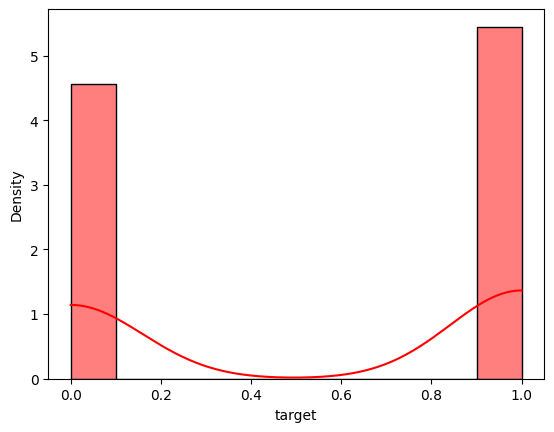

In [31]:
sns.histplot(h_data['target'], stat='density', kde=True, color='r')

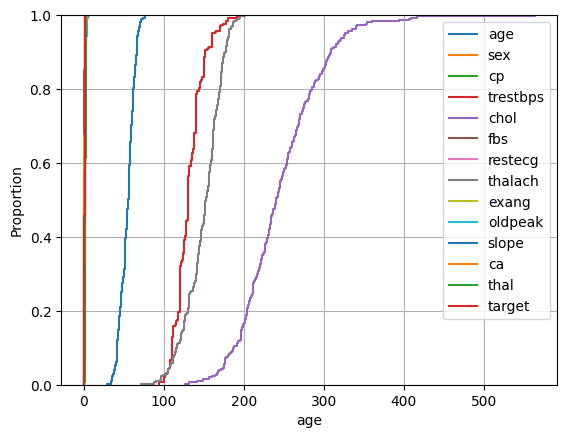

In [32]:
# ECDF
for col in h_data.columns:
    sns.ecdfplot(h_data[col], label=col)

plt.grid('on')
plt.legend()
plt.show()

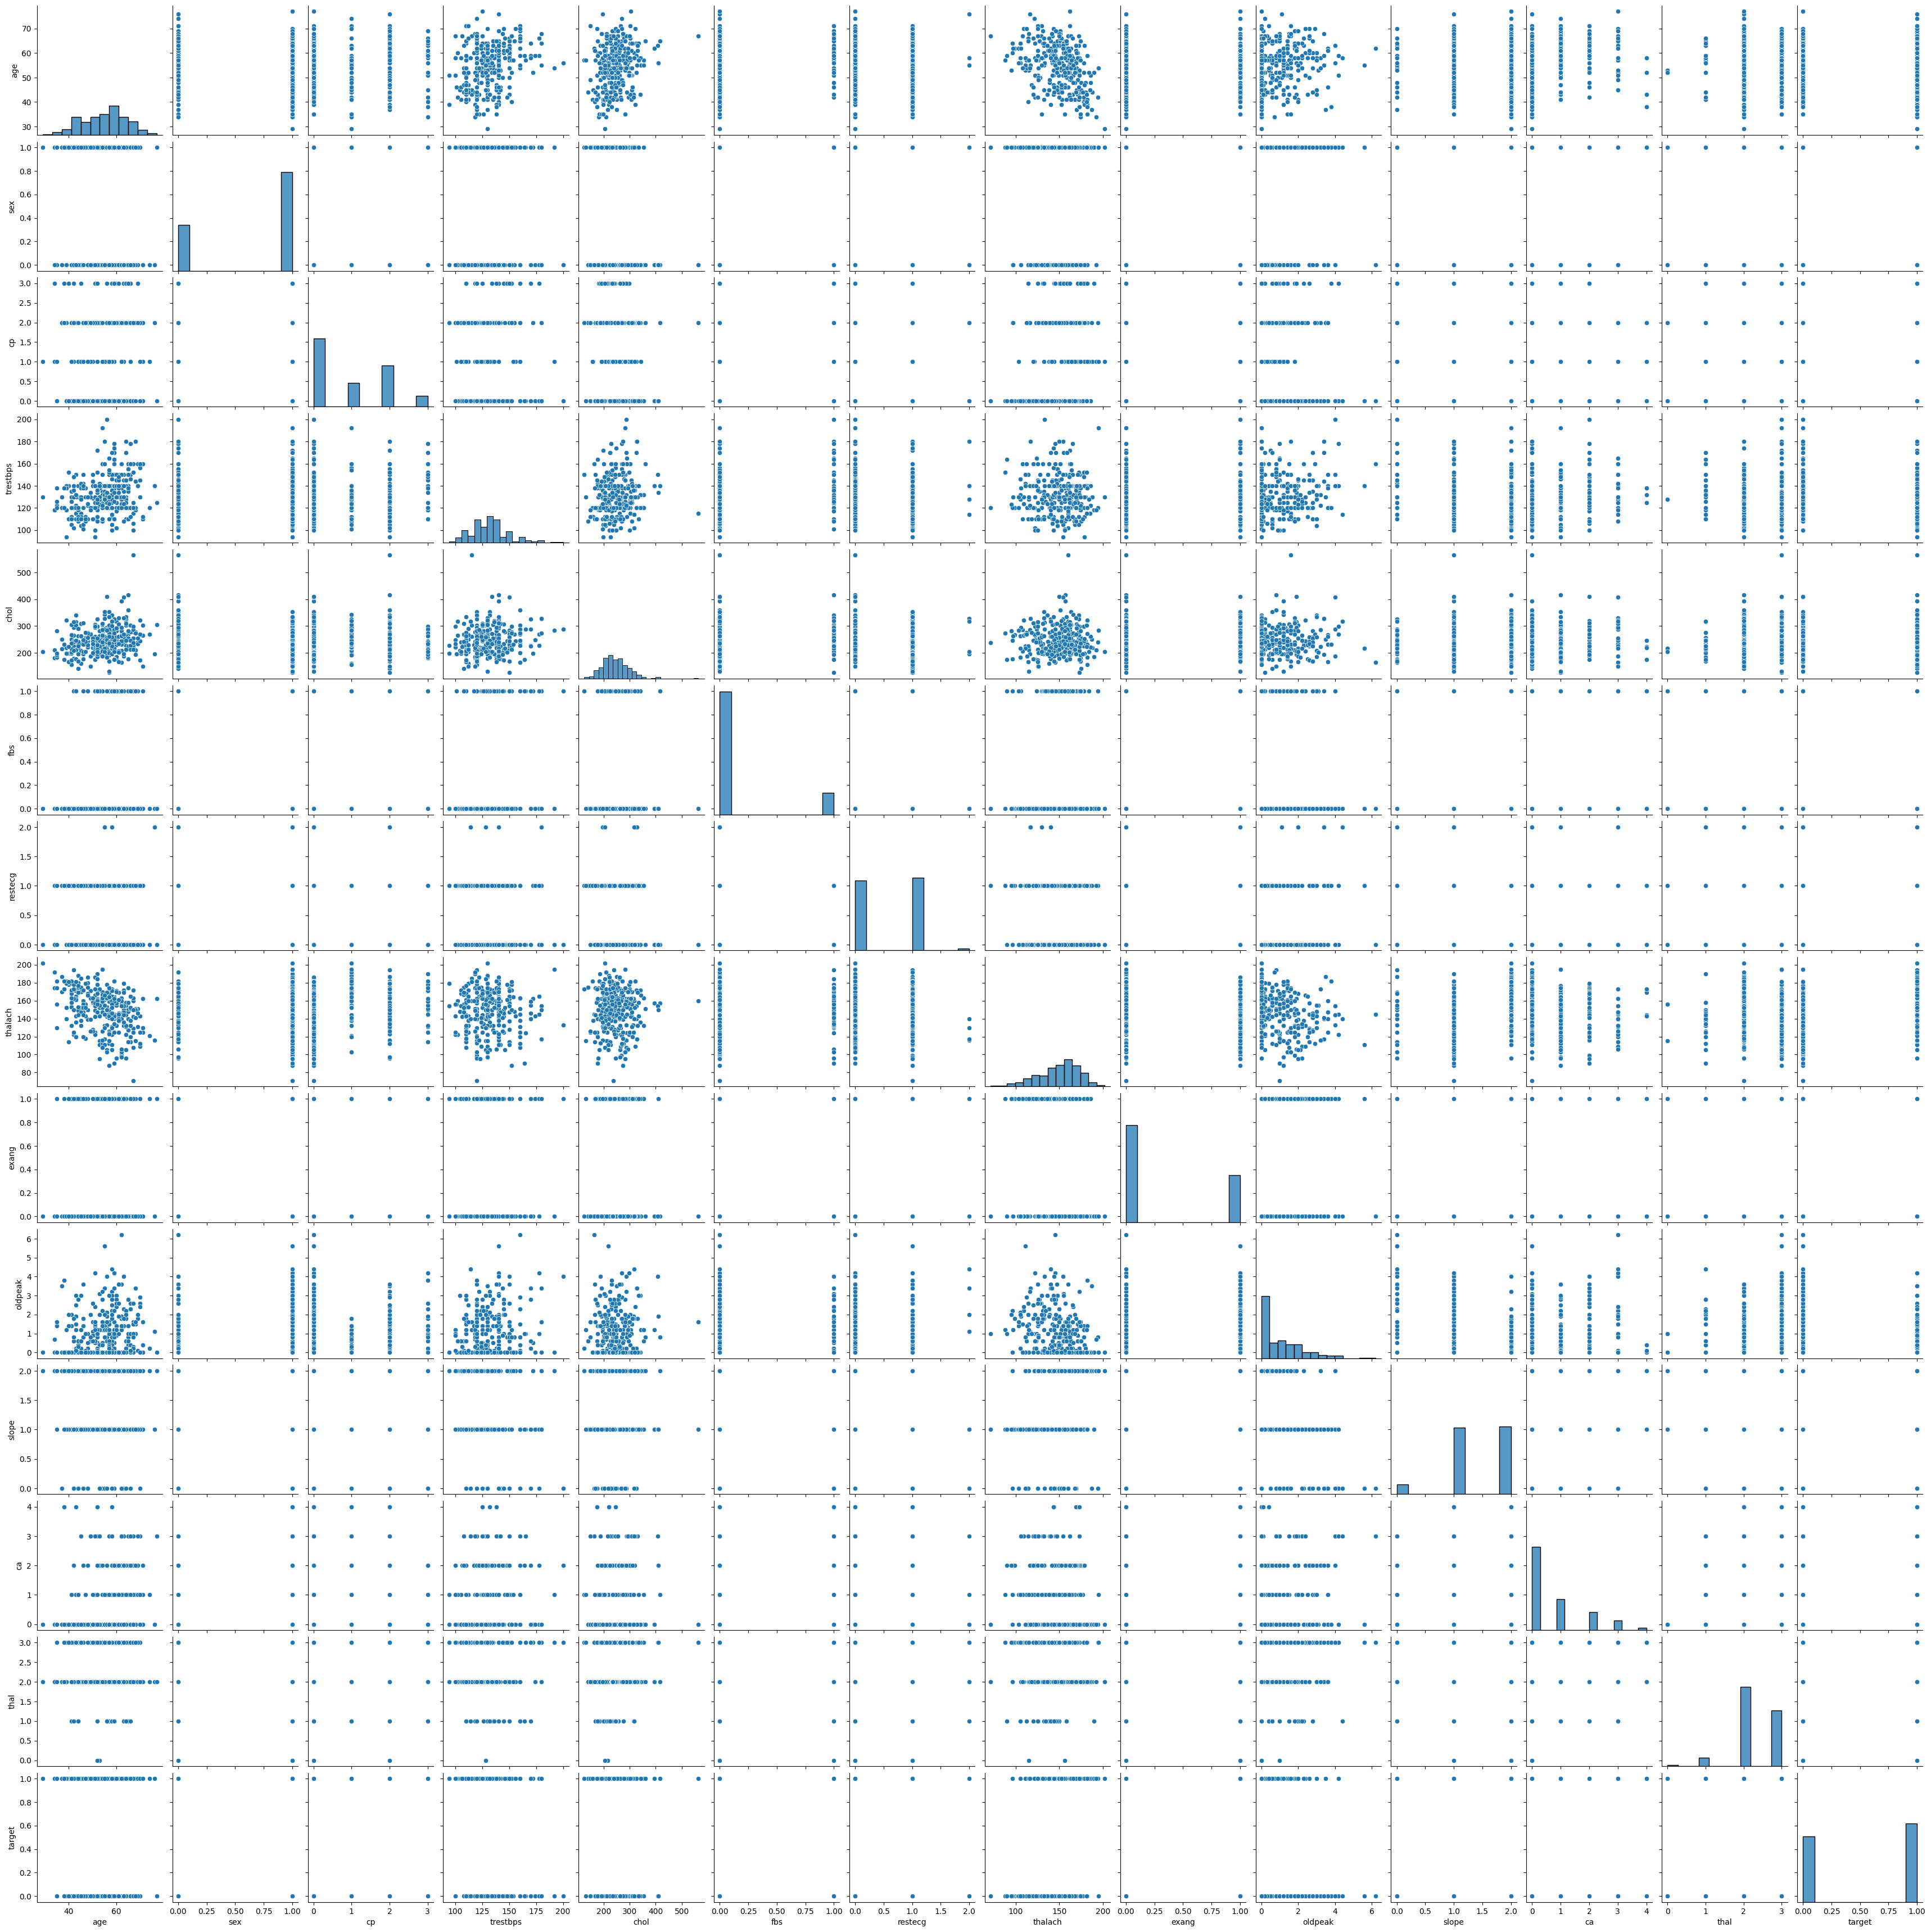

In [33]:
# Pairplot
sns.pairplot(h_data)
plt.show()

***
**5. Вычислить матрицу корреляций между признаками. Построить тепловую карту (heatmap).**
***

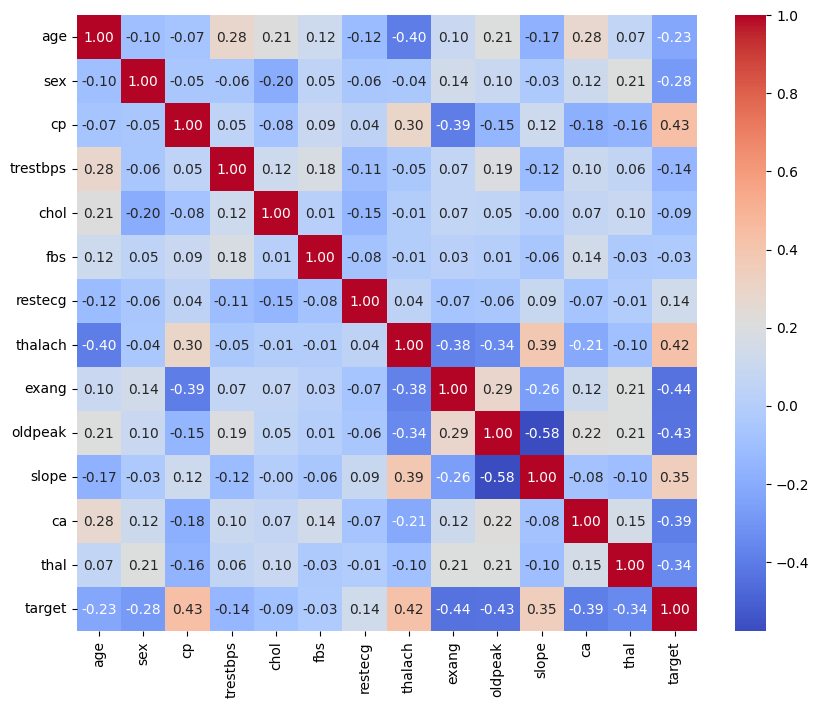

In [34]:
# Матрица корреляций
correlation_matrix = h_data.corr()

# Тепловая карта
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

### Дополнительное исследование датасета

***
**1. Извлечения новых признаков (feature extraction).**
***

На основе тепловой карты сделаем некоторые выводы:

*   `'fbs'`, `'chol'` очень слабо коррелирует с целевой переменной `'target'`;
*   наблюдается сильная корреляция между `'oldpeak'` и `'slope'`, а также их почти равнозначная корреляция с целевой переменной `'target'`

Для решения вопроса с `'oldpeak'` и `'slope'` воспользуемся методом главных компонент `(PCA)` и извлечем два новых признака

In [57]:
from sklearn.decomposition import PCA


y_data_h_new = h_data['target']
x_data_h_new = h_data.drop('target', axis=1)

pca = PCA(n_components=2)  # количество новых признаков
pca_result = pca.fit_transform(x_data_h_new[['oldpeak', 'slope']])
x_data_h_new = pd.concat([x_data_h_new, pd.DataFrame(pca_result, columns=['oldpeak_slope_1', 'oldpeak_slope_2'])], axis=1)
x_data_h_new

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,oldpeak_slope_1,oldpeak_slope_2
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1.666666,-0.876913
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,2.792572,-0.461781
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0.130349,0.688249
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,-0.432604,0.480683
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,-0.620255,0.411495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,-0.649614,-0.665138
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0.288641,-0.319195
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,2.352803,0.441880
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0.288641,-0.319195


***
**2. Преобразования признаков (feature transformation). Как минимум z-score scaling.**
***

Для преобразования признаков можно использовать стандартное масштабирование, такое как z-score scaling:

In [59]:
mean_h = np.mean(x_data_h_new)
std_h = np.std(x_data_h_new)
x_data_h_new = (x_data_h_new - mean_h) / std_h
x_data_h_new

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,oldpeak_slope_1,oldpeak_slope_2
0,2.642611,-82.697009,-35.212951,7.199322,4.322813,-110.029834,-74.859177,4.869293,-83.545412,-32.530359,-63.838119,-37.968538,-62.237454,-31.395502,-82.819884
1,-0.204919,-82.697009,-36.194604,6.181788,4.701365,-112.935215,-72.933344,6.490508,-83.545412,-31.462946,-63.838119,-37.968538,-60.594050,-30.445388,-81.954905
2,0.233162,-84.880656,-37.176258,6.181788,3.677048,-112.935215,-74.859177,5.833259,-83.545412,-33.330919,-60.553510,-37.968538,-60.594050,-32.691946,-79.558673
3,1.875968,-82.697009,-37.176258,5.503432,4.389616,-112.935215,-72.933344,6.096158,-83.545412,-33.864626,-60.553510,-37.968538,-60.594050,-33.167003,-79.991163
4,1.985488,-84.880656,-38.157911,5.503432,7.017210,-112.935215,-72.933344,5.438909,-81.396116,-34.042528,-60.553510,-37.968538,-60.594050,-33.325355,-80.135326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1.985488,-84.880656,-38.157911,6.860144,4.500955,-112.935215,-72.933344,3.686245,-81.396116,-34.398332,-62.195815,-37.968538,-58.950646,-33.350130,-82.378625
299,0.671244,-82.697009,-35.212951,4.825075,5.013113,-112.935215,-72.933344,4.080594,-83.545412,-33.508821,-62.195815,-37.968538,-58.950646,-32.558369,-81.657809
300,3.190212,-82.697009,-38.157911,7.131486,3.432103,-110.029834,-72.933344,4.474944,-83.545412,-31.551897,-62.195815,-36.014975,-58.950646,-30.816494,-80.072014
301,1.985488,-82.697009,-38.157911,6.181788,2.051503,-112.935215,-72.933344,3.335712,-81.396116,-33.508821,-62.195815,-36.991757,-58.950646,-32.558369,-81.657809


***
**3. Отбора признаков и объектов (feature selection). Как минимум анализ выбросов, аномалий и сильно коррелирующих признаков.**
***

Анализ выбросов

Используем IQR для выявления выбросов непрерывных переменных `'thalach'`, `'chol'`, `'trestbps'`

In [60]:
# IQR - межквартильный размах
Q1 = x_data_h_new.quantile(0.25)
Q3 = x_data_h_new.quantile(0.75)
IQR = Q3 - Q1

# Отбор нормальных данных
x_data_h_new = x_data_h_new[((x_data_h_new['thalach'] > (Q1 - 1.5 * IQR)['thalach']) & (x_data_h_new['thalach'] < (Q3 + 1.5 * IQR)['thalach'])) &
                            ((x_data_h_new['chol'] > (Q1 - 1.5 * IQR)['chol']) & (x_data_h_new['chol'] < (Q3 + 1.5 * IQR)['chol'])) &
                            ((x_data_h_new['trestbps'] > (Q1 - 1.5 * IQR)['trestbps']) & (x_data_h_new['trestbps'] < (Q3 + 1.5 * IQR)['trestbps']))]
x_data_h_new

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,oldpeak_slope_1,oldpeak_slope_2
0,2.642611,-82.697009,-35.212951,7.199322,4.322813,-110.029834,-74.859177,4.869293,-83.545412,-32.530359,-63.838119,-37.968538,-62.237454,-31.395502,-82.819884
1,-0.204919,-82.697009,-36.194604,6.181788,4.701365,-112.935215,-72.933344,6.490508,-83.545412,-31.462946,-63.838119,-37.968538,-60.594050,-30.445388,-81.954905
2,0.233162,-84.880656,-37.176258,6.181788,3.677048,-112.935215,-74.859177,5.833259,-83.545412,-33.330919,-60.553510,-37.968538,-60.594050,-32.691946,-79.558673
3,1.875968,-82.697009,-37.176258,5.503432,4.389616,-112.935215,-72.933344,6.096158,-83.545412,-33.864626,-60.553510,-37.968538,-60.594050,-33.167003,-79.991163
4,1.985488,-84.880656,-38.157911,5.503432,7.017210,-112.935215,-72.933344,5.438909,-81.396116,-34.042528,-60.553510,-37.968538,-60.594050,-33.325355,-80.135326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1.985488,-84.880656,-38.157911,6.860144,4.500955,-112.935215,-72.933344,3.686245,-81.396116,-34.398332,-62.195815,-37.968538,-58.950646,-33.350130,-82.378625
299,0.671244,-82.697009,-35.212951,4.825075,5.013113,-112.935215,-72.933344,4.080594,-83.545412,-33.508821,-62.195815,-37.968538,-58.950646,-32.558369,-81.657809
300,3.190212,-82.697009,-38.157911,7.131486,3.432103,-110.029834,-72.933344,4.474944,-83.545412,-31.551897,-62.195815,-36.014975,-58.950646,-30.816494,-80.072014
301,1.985488,-82.697009,-38.157911,6.181788,2.051503,-112.935215,-72.933344,3.335712,-81.396116,-33.508821,-62.195815,-36.991757,-58.950646,-32.558369,-81.657809


Отбор сильно коррелирующих признаков

Можно рассмотреть коррелирующие признаки:

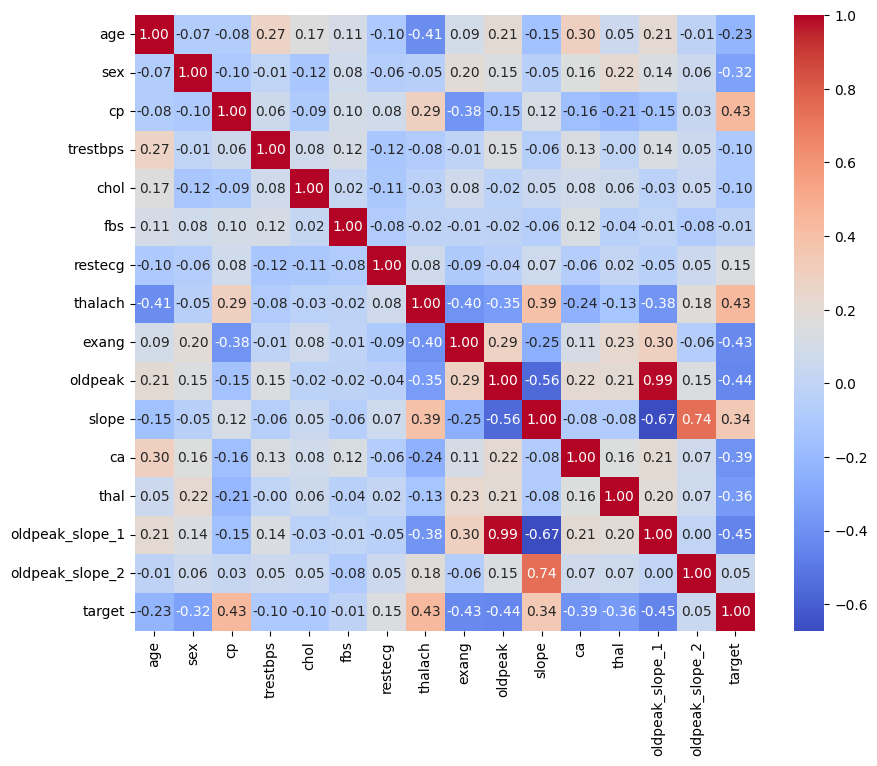

In [72]:
# Матрица корреляций

full_data_h = pd.concat([x_data_h_new, y_data_h_new],axis=1)
correlation_matrix = full_data_h.corr()

# Тепловая карта
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

По новой тепловой матрице сделаем выводы:
*   Слабое влияние на целевую переменную `'target'`: `'fbs'`, `'oldpeak_slope_2'`, `'chol'`, `'trestbps'`, `'restecg'`;
*   Сильная корреляция между `'oldpeak_slope_1'` и `'oldpeak'`, `'oldpeak_slope_1'` и `'slope'`, `'oldpeak'` и `'slope'`

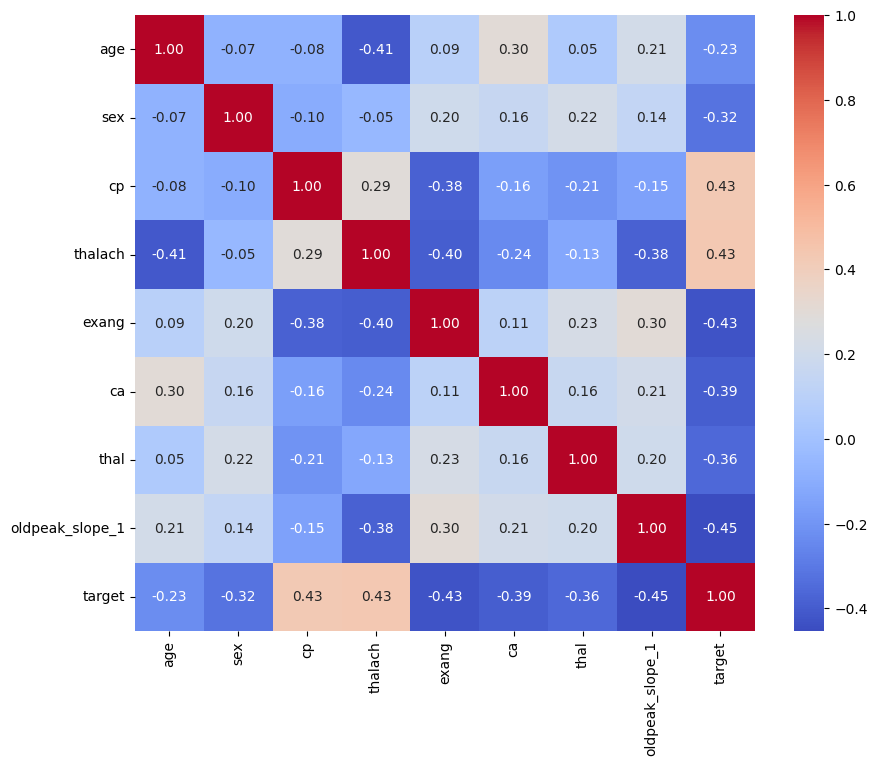

In [73]:
full_data_h = full_data_h.drop('fbs', axis=1)
full_data_h = full_data_h.drop('oldpeak_slope_2', axis=1)
full_data_h = full_data_h.drop('chol', axis=1)
full_data_h = full_data_h.drop('trestbps', axis=1)
full_data_h = full_data_h.drop('oldpeak', axis=1)
full_data_h = full_data_h.drop('slope', axis=1)
full_data_h = full_data_h.drop('restecg', axis=1)

# Матрица корреляций
correlation_matrix = full_data_h.corr()

# Тепловая карта
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

***
**4. Сохранение данных для дальнейшей работы.**
***

Так как мы удаляли выбросы, проведем восстановление значений `Nan`

In [74]:
def nan_filler(data):
    for label, content in data.items():
        if pd.api.types.is_numeric_dtype(content):
            data[label] = content.fillna(content.median())
        else:
            data[label] = content.astype("category").cat.as_ordered()
            data[label] = pd.Categorical(content).codes+1

nan_filler(full_data_h)

In [75]:
full_data_h.to_csv(os.path.join('drive/MyDrive/ML_3_year_data','heart_new.csv'))